In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import time

sys.path.append('../utilities')
from utilities2015 import *

# from joblib import Parallel, delayed

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stack_name = 'MD595'
section_id = 102
# dm = DataManager(stack=stack_name, section=section_id, segm_params_id='gridsize200')
dm = DataManager(stack=stack_name, section=section_id, segm_params_id='tSLIC200')

In [3]:
dm.load_multiple_results(results=['texHist', 'segmentation', 'texMap', 'neighbors', 
                                  'edgeCoords', 'spCentroids', 'edgeNeighbors', 'dedgeNeighbors',
                                  'spCoords', 'spAreas'])

In [4]:
import warnings
warnings.filterwarnings('default')

In [5]:
dm.neighbors_long[901]

{808, 817, 825, 895, 960, 993, 995}

In [17]:
t = time.time()

clusters_allhistory, score_tuples, peaks_sorted, _, _, peaks1, peaks2 = dm.grow_cluster(2464,
                                                                        seed_weight=0,
                                                                        verbose=False, all_history=True, 
                                                                        num_sp_percentage_limit=0.03,
                                                                     min_size=1, min_distance=2,
                                                                        threshold_abs=-0.1,
                                                                        threshold_rel=0.02,
                                                                       peakedness_limit=.002,
                                                                       method='rc-mean')    
    
print time.time()-t

0.055321931839
2464 terminate due to over-size
7.23152208328


2464


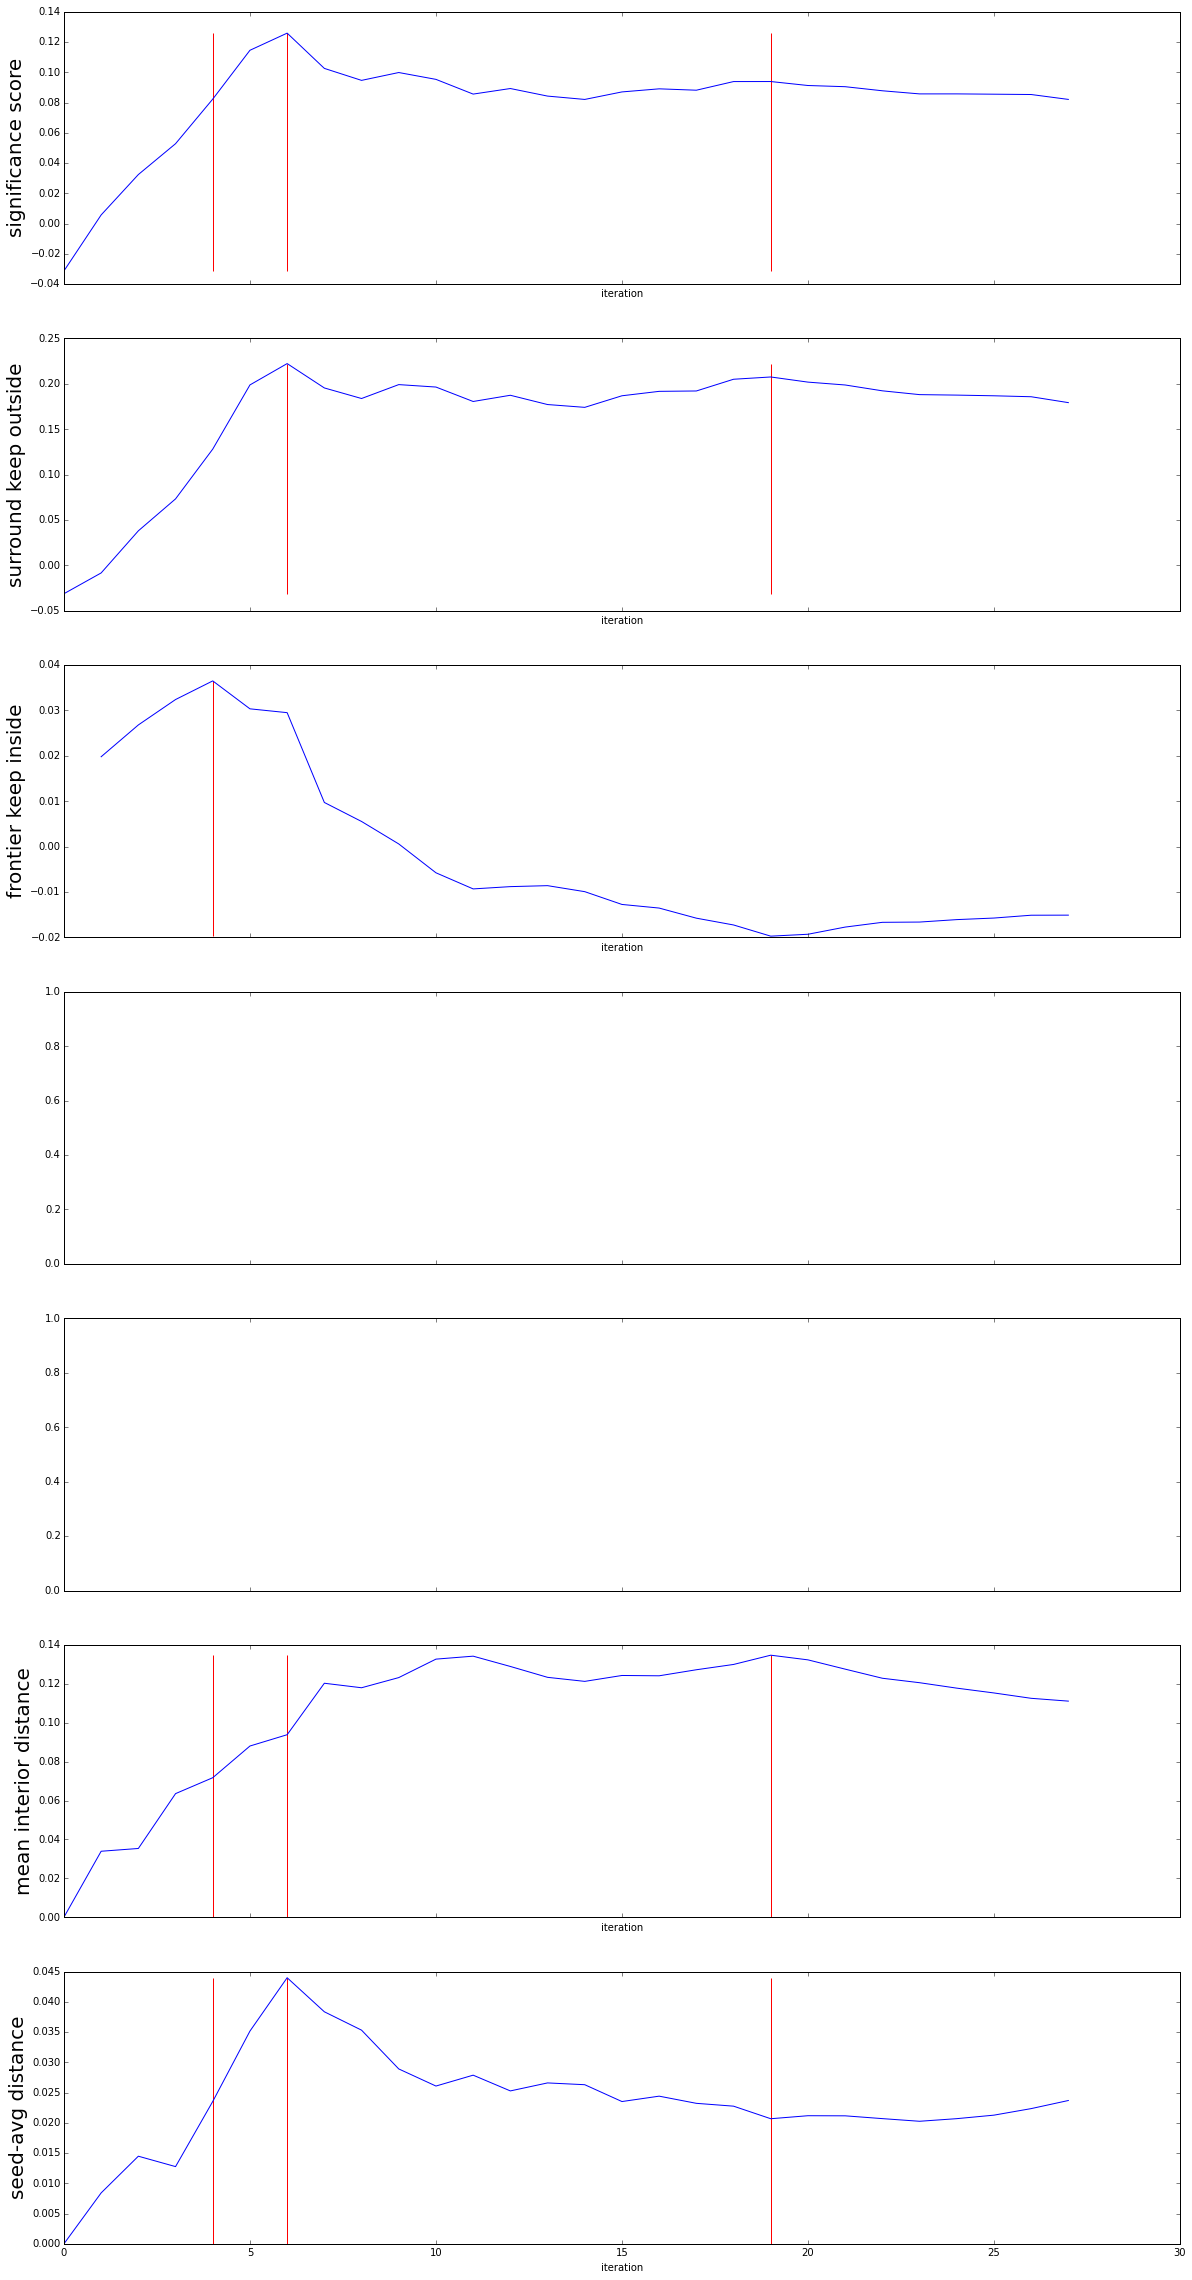

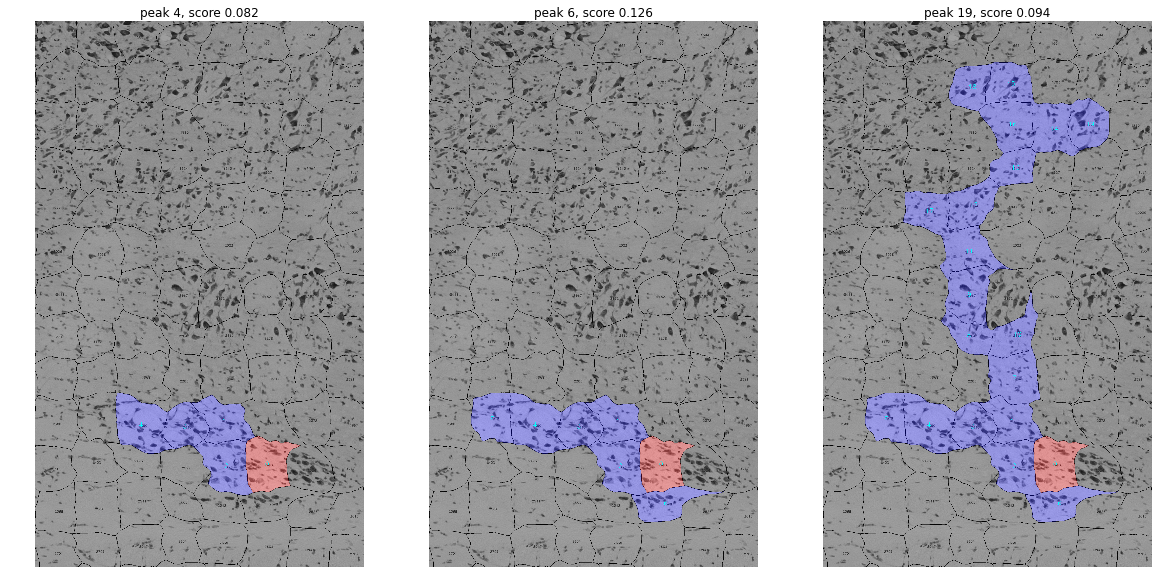

In [16]:
dm.plot_scores(peaks1, peaks2, clusters_allhistory, score_tuples, visualize_peaks=True)

In [27]:
from slic_texture import enforce_connectivity

In [28]:
seg = enforce_connectivity(dm.segmentation, sp_area_limit=2000)

/oasis/projects/nsf/csd181/yuncong/virtualenv-1.9.1/yuncongve/lib/python2.7/site-packages/skimage/measure/_label.py:5: DeprecationWarning: The default value for `background` will change to 0 in v0.12
  return _label(input, neighbors, background, return_num, connectivity)


In [30]:
np.where(seg == 901)

(array([3746, 3746, 3746, ..., 3952, 3952, 3952]),
 array([3419, 3420, 3421, ..., 3393, 3394, 3395]))

In [26]:
dm.sp_areas[901]

1.0

In [ ]:
viz = dm.visualize_cluster([901])
display(viz)

In [11]:
viz = dm.visualize_cluster(clusters_allhistory[20])
display(viz)

/oasis/projects/nsf/csd181/yuncong/virtualenv-1.9.1/yuncongve/lib/python2.7/site-packages/PIL/Image.py:2261: DecompressionBombWarning: Image size (203470848 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
/oasis/projects/nsf/csd181/yuncong/virtualenv-1.9.1/yuncongve/lib/python2.7/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


/oasis/projects/nsf/csd395/yuncong/Brain/notebooks/tmp.jpg